#Logistic Regression

- Models the probability of getting either outcome of a binary response (0/1)
- **Linear classifier** since log odds of the response (Y) can be represented as a linear combination of features (X)

Here we will cover the following:

- **Logit Function**
- **Interpretation of coefficients**
- **Cost Function**
- **Multiple Logistic Regression**

<br>

##Logit Function

- **Probability of getting a 1 / 0 given data in terms of the logit function**

$$p(Y=1 \ | \ X) = \frac{1}{1 + e^{-w^TX}}$$

$$p(Y=0 \ | \ X) = 1- p(Y=1 \ | \ X) = \frac{e^{-w^TX}}{1 + e^{-w^TX}}$$

<br>

- **"S" shape of the logit function makes it appropriate to model the probability of a binary target**

    - The closer the feature values is to the decision boundary of the response classes (red dotted line below)
    - The more sensitive the probability of getting a 1/0 is to changes to the feature values
    - Make intuitive sense since small changes in features near the decision boundary could shift the decision from 0 to 1 and vice versa

<br>

- **Plot of the logit function**

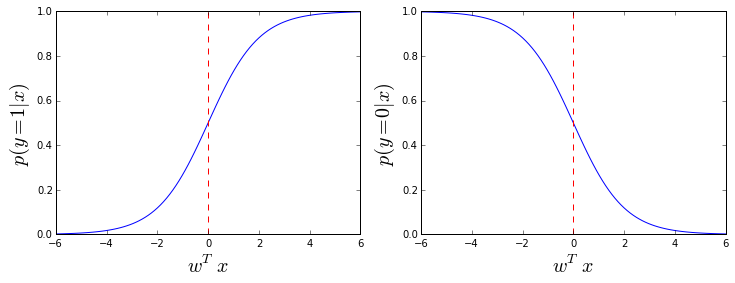

In [1]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def logit_1(wx):
    return 1 / (1 + np.exp(-wx))

def logit_0(wx):
    return np.exp(-wx) / (1 + np.exp(-wx))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
wx = np.linspace(-6, 6, 100)
# P(Y=1 | X)
y1 = logit_1(wx)
ax1.plot(wx, y1)
ax1.set_xlabel('$w^Tx$', fontsize=20)
ax1.set_ylabel('$p(y=1 | x)$', fontsize=20)
ax1.axvline(x=0, c='r', ls='--')
# P(Y=0 | X)
y0 = logit_0(wx)
ax2.plot(wx, y0)
ax2.set_xlabel('$w^Tx$', fontsize=20)
ax2.set_ylabel('$p(y=0 | x)$', fontsize=20)
ax2.axvline(x=0, c='r', ls='--');

##Interpretation of coefficients

- **Unlike linear regression, coefficients from logistic regression cannot be interpreted directly**
    - Probability of getting a response is **not** a linear combination of the coefficients and features

  <br>  

- **Example below shows how to interpret the coefficients**

    Consider modeling the probability of getting lung cancer with 2 variables: 
    - Number of cigarette smoked per day ($X_1$)
    - Number of minutes of exercise per day ($X_2$)

    $$p(Y=1 \ | \ X) = \frac{1}{1 + e^{-(\beta_1X_1 + \beta_2X_2 + \epsilon)}}$$

    $$p(Y=1 \ | \ X) +  p(Y=1 \ | \ X)e^{-(\beta_1X_1 + \beta_2X_2 + \epsilon)} = 1$$

    $$-(\beta_1X_1 + \beta_2X_2 + \epsilon) = log(\frac{1 - p(Y=1 \ | \ X)}{p(Y=1 \ | \ X)})$$

    $$\beta_1X_1 + \beta_2X_2 + \epsilon = log(\frac{p(Y=1 \ | \ X)}{1 - p(Y=1 \ | \ X)})$$

    $$e^{\beta_1X_1 + \beta_2X_2 + \epsilon} = \frac{p(Y=1 \ | \ X)}{1 - p(Y=1 \ | \ X)}$$

    <br>

    - If $\beta_1 = 1.3$, the odds of getting lung cancer increases by **a factor of**  $e^{1.3}$ for every extra cigarette you smoke a day

    - So the increase of odds of getting lung cancer is **different by increasing from 3 to 4 cigarettes compared to increasing from 10 to 11**

##Cost Function

- Quantifies the error between the fitted model and the data
  - The lower the cost, the less error between the fitted model and the data
  - At the lowest cost of a given model exists the coefficients (weights) that gives us the best fit to the data
  - Therefore, the object is to **find the lowest cost**

  <br>

- The cost function for logistic regression is **negative likeliehood (NL)**
  
  - Negative likelihood penalizes uncertain / wrong prediction
  - **Uncertain prediction** such as 0.5
  - **Wrong prediction** such as prediction 1.0 for the response 1 when the response is 0
  - Formula for **negative likelihood**
 
  
  $$NL(\beta) = - \prod_{i=1}^n p(y_i=1 \ | \ x_i)^{y_i} p(y_i=0 \ | \ x_i)^{1-y_i}$$


- **In practice, negative log likelihood (NLL) is used**
  - Taking the product of a large number of fractions leads to numeric underflow
  - Taking the log of the negative likelihood solves the problem
  - Also known as cross entropy
  - Formula for **negative log likelihood**
  
  $$NLL(\beta) = \sum_{i=1}^{n} y_i log(p(y_i=1 \ | \ x_i)) + (1-y_i)log(p(y_i=0 \ | \ x_i))$$

##Multiple Logisitic Regression

- Also known as softmax regression